# Ajuste de modelos funcionales para un conjunto de datos mediante el método de $\chi^{2}$ y análisis de correlación entre dos variables

In [7]:
import numpy as np
import pandas as pd
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import itertools

# Introducción 

Se realiza un ajuste de un conjunto de datos, experimentales, para dos variables, $x$ y $y$, las cuales dependen de una variable $t$. Se proponen 2 modelos que se basan en el hecho de que las variables $x$ y $y$ en función de $t$ tienen un comportamiento como de una señal, que se compone de sumas de funciones senos. A partir del método de calcular el menor $\chi^{2}$ podemos enocontrar los parámetros que mejor ajustan nuestros modelos al conjunto de datos; y por último se realiza un análisis de correlación entre las variables $x$ y $y$ para tratar de encontrar una dependencia entre estas variables y si podemos derivar una función explícita a partir de nuestros modelos.  

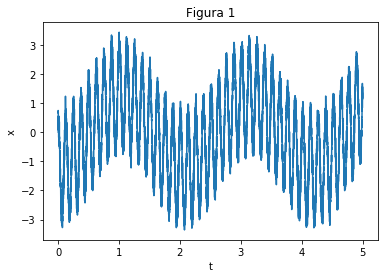

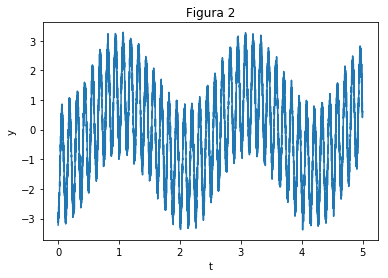

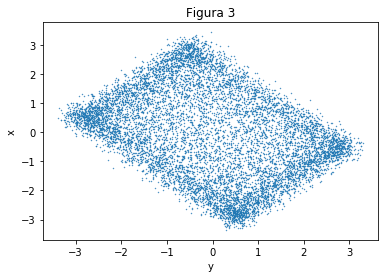

In [8]:
data = pd.read_csv('data.csv')

t = np.array(data.iloc[:,0])
x = np.array(data.iloc[:,1])
y = np.array(data.iloc[:,2])

plt.plot(t,x)
plt.xlabel("t")
plt.ylabel('x')
plt.title('Figura 1')
plt.show()
plt.plot(t,y)
plt.title('Figura 2')
plt.xlabel("t")
plt.ylabel('y')
plt.show()
plt.plot(y,x,'o', ms=0.4)
plt.title('Figura 3')
plt.xlabel("y")
plt.ylabel('x')
plt.show()



# Transformadas de Fourier 

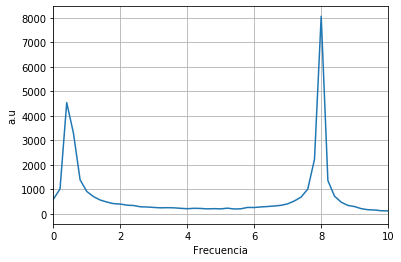

In [15]:
#Implementación de la transformada de Fourier por la librería scipy
#Datos x en función de t
dt = (t[9998] - t[0])/t.size


dataxft = fourier.fft(x)
dataxft = fourier.fftshift(dataxft)
absdataxft = abs(dataxft)
frq=fourier.fftfreq(t.size, dt)
frq=fourier.fftshift(frq)

plt.plot(frq,absdataxft)
plt.xlim(0,10)
#plt.ylim(0,2000)
plt.grid()
plt.xlabel('Frecuencia')
plt.ylabel('a.u')
plt.show()


In [16]:
#Hallar las frecuencias de los datos en x 

for i in range(len(frq)):
    
    if frq[i]>0: break
    l=i

newf=frq[l:]

for i in range(len(newf)):
    
    if newf[i]>2.7: break
    j=i
    
frq_cuted = newf[:j+1]

au = absdataxft[l:]
au1_cuted = au[:j+1]

I1 = max(au1_cuted)
index = np.where(au1_cuted == I1)[0]

wx1 = frq_cuted[index]

frq_cuted2 = newf[j+1:]

au2_cuted = au[j+1:]

I2 = max(au2_cuted)
index2 = np.where(au2_cuted == I2)[0]
wx2 = frq_cuted2[index2]


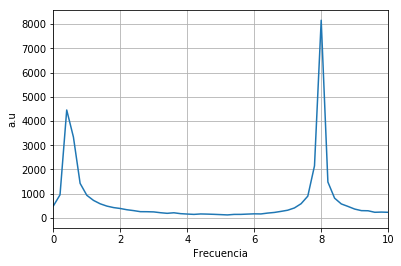

In [9]:
#Datos y en función de t
datayft = fourier.fft(y)
datayft = fourier.fftshift(datayft)
absdatayft = abs(datayft)

plt.plot(frq,absdatayft)
plt.xlim(0,10)
plt.grid()
plt.xlabel('Frecuencia')
plt.ylabel('a.u')
plt.show()

In [18]:
#Hallar las frecuencias de los datos en y 

for i in range(len(frq)):
    
    if frq[i]>0: break
    l=i

newf=frq[l:]

for i in range(len(newf)):
    
    if newf[i]>2.7: break
    j=i
    
frq_cuted = newf[:j+1]

au = absdatayft[l:]
au1_cuted = au[:j+1]

I1 = max(au1_cuted)
index = np.where(au1_cuted == I1)[0]

wy1 = frq_cuted[index]

frq_cuted2 = newf[j+1:]

au2_cuted = au[j+1:]

I2 = max(au2_cuted)
index2 = np.where(au2_cuted == I2)[0]
wy2 = frq_cuted2[index2]


In [23]:
#Frecuencias obtenidas de la transformada de Fourier
print("Las frecuencias de XvsT son: ", 'f1x = ',float(wx1),',','f2x = ', float(wx2))
print ("Las frecuencias de YvsT son: ",  'f1y = ',float(wy1), ',', 'f2y = ', float(wy2))

Las frecuencias de XvsT son:  f1x =  0.40004000800160033 , f2x =  8.000800160032007
Las frecuencias de YvsT son:  f1y =  0.40004000800160033 , f2y =  8.000800160032007


# Primer modelo

En este modelo proponemos las siguientes funciones, para ajustar.

$$x = -Asin(\omega t + \phi_{1}) + Bsin(2\pi f_{2x}t + \phi_{2})$$

$$y = A_{2}sin(\omega_{2}t + \phi_{3}) + B_{2}sin(2\pi f_{2y}t + \phi_{4})$$

Donde, $A$,$B$,$\omega$,$\phi_{1},\phi_{2},A_{2},\omega_{2},\phi_{3},B_{2}$ y $\phi_{4}$ son parámetros.

## Para x vs t

In [8]:
#Parametros
a = np.linspace(1.0,1.3,6) #Amplitud primer sin
b = np.linspace(1.85,2.2,6) #Amplitud segundo sin
phi1 = np.linspace(1.8,2.1,6) #Fase primer sin
phi2 = np.linspace(1.4,1.65,6) #Fase segundo sin
w1 = np.linspace(2.7,2.95,6) #Frecuencia primer sin
#w2 = np.linspace(35,45,3)

z = itertools.product(a,b,w1,phi1,phi2) # Producto cartesiano de los parametros

#Funcion propuesta
def f(i,t):
    func = -i[0]*np.sin(i[2]*t + i[3]) + i[1]*np.sin(wx2*2*np.pi*t + i[4])
    return func

In [9]:
#Calculo de chi**2
minimo = []
chi2 =[]
for i in list(z):
    xmod = f(i,t)
    suma = 0
               
    for h in range(len(x)):
        chi = ((x[h] - xmod[h])**(2))/(abs(xmod[h]))
        suma+=chi
    chi2.append(suma)
    if suma<=min(chi2): #para el valor minimo de chi**2
        minimo = []
        minimo.append([suma,i])

In [10]:
# Valores minimos encontrados para los parametros
arr = minimo[0][1]
print arr

(1.3, 2.1300000000000003, 2.9000000000000004, 1.8, 1.3999999999999999)


In [11]:
# Valor minimo de chi**2 encontrado para x vs t con el primer modelo
min(chi2)/10000

2.2211849510059345

Los valores óptimos que hallamos para el ajuste, mediante el método del menor $\chi^{2}$ fueron los siguientes:

$A = 1.3$

$B = 2.1300000000000003$

$\omega = 2.9000000000000004$

$\phi_{1} = 1.8$

$\phi_{2} = 1.3999999999999999$


Con $\chi^{2} = 2.2211849510059345$

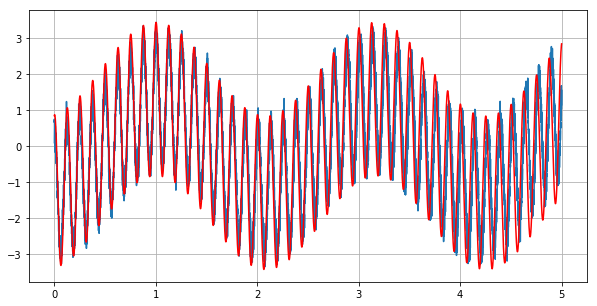

In [12]:
# Grafica de los datos x vs t con el ajuste
plt.figure(figsize = (10,5))
plt.grid()
plt.plot(t,x)
f = -arr[0]*np.sin(arr[2]*t + arr[3]) + arr[1]*np.sin(wx2*2*np.pi*t + arr[4])
plt.plot(t,f,'r')
plt.show()

## Para y vs t

In [265]:
#Parametros
a = np.linspace(1.0,1.3,6) #Amplitud primer seno
b = np.linspace(1.9,2.2,6) #Amplitud segundo seno
phi1 = np.linspace(4.6,4.8,6)
phi2 = np.linspace(1.15,1.45,6)
w1 = np.linspace(2.67,2.95,6) 
#w2 = np.linspace(35,45,3)

z = itertools.product(a,b,w1,phi1,phi2)

# Funcion propuesta para y vs t del primer modelo
def f(i,t):
    func = i[0]*np.sin(i[2]*t + i[3]) - i[1]*np.sin(wy2*2*np.pi*t + i[4])
    return func

In [266]:
#Calculo de chi**2
minimo = []
chi2 =[]
for i in list(z):
    ymod = f(i,t)
    suma = 0
               
    for h in range(len(y)):
        chi = ((y[h] - ymod[h])**(2))/(abs(ymod[h]))
        suma+=chi
    chi2.append(suma)
    if suma<=min(chi2):
        minimo = []
        minimo.append([suma,i])

In [268]:
# Valores de los parametros para el minimo chi**2
arry = minimo[0][1]
print arry

(1.24, 2.02, 2.9500000000000002, 4.7599999999999998, 1.1499999999999999)


In [269]:
# Valor de chi**2 encontrado para y vs t con el primer modelo
min(chi2)/10000 

1.4426472833869284

Los valores óptimos que hallamos para el ajuste, mediante el método del menor $\chi^{2}$ fueron los siguientes:

$A_{2} = 1.24$

$B_{2} = 2.02$

$\omega_{2} = 2.9500000000000002$

$\phi_{3} = 4.7599999999999998$

$\phi_{4} = 1.1499999999999999$


Con $\chi^{2} = 1.4426472833869284$

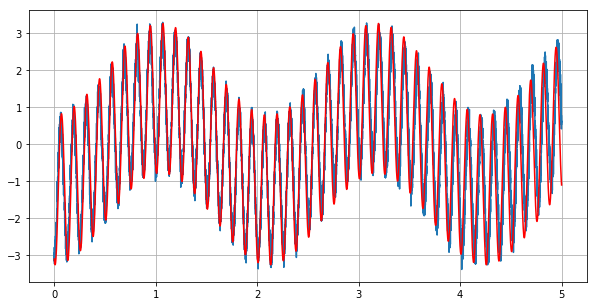

In [271]:
#Grafica de los datos y vs t con el ajuste
plt.figure(figsize = (10,5))
h = arry[0]*np.sin(arry[2]*t + arry[3]) - arry[1]*np.sin(50.27051001*t + arry[4])
plt.grid()
plt.plot(t,y)
plt.plot(t,h, 'r')
plt.show()

# Segundo modelo

Proponiendo otro modelo para el ajuste de los datos de x vs t, y vs t
Para compararlos entre si y tomar el mejor modelo de ajuste, teniendo en cuenta el menor $\chi^2$

Los modelos que proponemos esta vez son:

$$x = -Asin(\omega t + \phi_{1}) + Bsin(2\pi f_{2x}t + \phi_{2})sin(110t)$$

$$y = A_{2}sin(\omega_{2}t + \phi_{3}) + B_{2}sin(2\pi f_{2y}t + \phi_{4})sin(110t)$$

Donde, $A$,$B$,$\omega$,$\phi_{1},\phi_{2},A_{2},\omega_{2},\phi_{3},B_{2}$ y $\phi_{4}$ son parámetros.

# Para x vs t

In [9]:
#Parametros
a = np.linspace(1.0,1.4,4)
b = np.linspace(1.7,2.2,4)
phi1 = np.linspace(1.8,2.1,4)
phi2 = np.linspace(1.3,1.7,4)
w1 = np.linspace(2.6,2.95,4) 
#w2 = np.linspace(35,45,3)

z = itertools.product(a,b,w1,phi1,phi2)

#Funcion propuesta diferente a la del primer modelo
def f(i,t):
    func = -i[0]*np.sin(i[2]*t + i[3]) + i[1]*np.sin(wx2*2*np.pi*t + i[4])*np.sin(110*t)
    return func

In [10]:
#Calculo de chi**2
minimo = []
chi2 =[]
for i in list(z):
    xmod = f(i,t)
    suma = 0
               
    for h in range(len(x)):
        chi = ((x[h] - xmod[h])**(2))/(abs(xmod[h]))
        suma+=chi
    chi2.append(suma)
    if suma<=min(chi2):
        minimo = []
        minimo.append([suma,i])

In [12]:
# Valores de los parametros para el chi**2 minimo
arr1 = minimo[0][1]
print arr1

(1.2666666666666666, 2.0333333333333332, 2.7166666666666668, 2.0, 1.3)


In [13]:
#Valor minimo de chi**2
min(chi2)/10000

7.3510475827086044

Los valores óptimos que hallamos para el ajuste, mediante el método del menor $\chi^{2}$ fueron los siguientes:

$A_ = 1.2666666666666666$

$B = 2.0333333333333332$

$\omega = 2.7166666666666668$

$\phi_{1} = 2.0$

$\phi_{2} = 1.3$


Con $\chi^{2} = 7.3510475827086044$

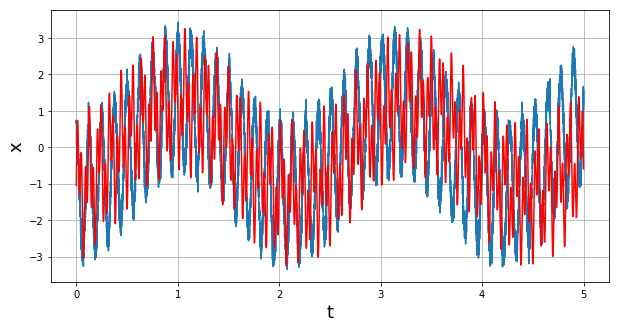

In [25]:
# Grafica x vs t para el segundo modelo
plt.figure(figsize = (10,5))
plt.xlabel("t",fontsize=18)
plt.ylabel("x",fontsize=18)
plt.grid()
plt.plot(t,x)
f = -arr1[0]*np.sin(arr1[2]*t + arr1[3]) + arr1[1]*np.sin(wx2*2*np.pi*t + arr1[4])*np.sin(110*t)
plt.plot(t,f,'r')
plt.show()

# Para y vs t

In [15]:
#Parametros
a = np.linspace(1.0,1.3,4)
b = np.linspace(1.9,2.2,4)
phi1 = np.linspace(4.6,4.8,4)
phi2 = np.linspace(1.15,1.45,4)
w1 = np.linspace(2.67,2.95,4) 
#w2 = np.linspace(35,45,3)

z = itertools.product(a,b,w1,phi1,phi2)

#Funcion propuesta diferente a la del primer modeo
def f(i,t):
    func = i[0]*np.sin(i[2]*t + i[3]) - i[1]*np.sin(wy2*2*np.pi*t + i[4])*np.sin(110*t)
    return func

In [16]:
#Calculo de chi**2
minimo = []
chi2 =[]
for i in list(z):
    ymod = f(i,t)
    suma = 0
               
    for h in range(len(y)):
        chi = ((y[h] - ymod[h])**(2))/(abs(ymod[h]))
        suma+=chi
    chi2.append(suma)
    if suma<=min(chi2):
        minimo = []
        minimo.append([suma,i])

In [17]:
# Valores de los parametros para el minimo chi**2
arry1 = minimo[0][1]
print arry1

(1.3, 2.2000000000000002, 2.6699999999999999, 4.7999999999999998, 1.45)


In [18]:
# Valor minimo de chi**2
min(chi2)/10000

7.3298820930638833

Los valores óptimos que hallamos para el ajuste, mediante el método del menor $\chi^{2}$ fueron los siguientes:

$A_{2} = 1.3$

$B_{2} = 2.2000000000000002$

$\omega_{2} = 2.6699999999999999$

$\phi_{3} = 4.7999999999999998$

$\phi_{4} = 1.45$


Con $\chi^{2} = 7.3298820930638833$

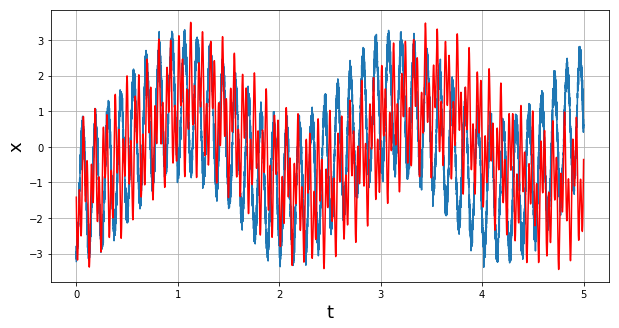

In [26]:
#Grafica y vs t para el segundo modelo
plt.figure(figsize = (10,5))
h = arry1[0]*np.sin(arry1[2]*t + arry1[3]) - arry1[1]*np.sin(50.27051001*t + arry1[4])*np.sin(110*t)
plt.xlabel("t",fontsize=18)
plt.ylabel("x",fontsize=18)
plt.grid()
plt.plot(t,y)
plt.plot(t,h, 'r')
plt.show()

# Comparacion entre los modelos

El primer modelo es bastante optimo como se pudo notar de los valores de $\chi^2$. Esto se vio reflejado en las graficas, las cuales se ajustaban visualmente a los datos. En el segundo modelo propuesto tambien se puede notar que visualmente no se ajustaba el modelo con los datos, algo que se esperaba debido a sus valorres grandes de $\chi^2$. 


# Coeficiente de correlación de Pearson



De la figura 3, vemos y podemos suponer que existe una correlación del tipo lineal, por lo que obtamos por calcular el coeficiente de correlación de Pearson, de tal manera que nos dé información acerca de la relación que existe entre las variables $x$ y $y$

In [10]:
R = np.corrcoef(x,y)[0,1]
R

-0.33465352207120153

Vemos que el coficiente de correlación de Pearson es -0.33465352, esto implica que las varibles, efectivamente, están correlacionadas. El hecho de que este valor esté más cercano a 0 que a 1 o -1, nos da información acerca del grado de correlación lineal, lo que quiere decir, en este caso, que esta relación lineal no es tan "fuerte" como para afirmar completamente que la dependencia de las varibles sea justamente lineal. Por otro lado vemos que el coeficiente es negativo, por lo cual la relación es inversa, es decir, los valores más altos de una variable tienden a estar asociados a los valores más bajos de la otra.

# Conclusiones

Como vimos en el desarrollo de los modelos, el mejor ajuste, evidentemente, se obtuvo del modelo en el cual el valor de $\chi^{2}$ es menor, tanto para $x(t)$ y $y(t)$, esto, en una primera instancia, se puede corroborar también visualmente en las figuras; por lo que podemos concluir que el método de ajuste mediante el menor valor de $\chi^{2}$, conlleva a los modelos que más se aproximan a la distribución, o función matemática, que describe una variable aleatoria.

Por otro lado, a través del coeficiente de correlación de Pearson podemos asegurar que las variables $x$ y $y$ son dependientes, sin embargo, no necesariamente esa dependecia es lineal, y tampoco implica que necesariamente exista un función que dé muestra de esa dependencia; si vemos el primer modelo que proponemos, que es el que mejor se ajusta, es una tarea muy complicada, y con alto porcentaje de fallar, tratar de encontrar una función que relacione $x$ y $y$.